In [1]:
import numpy as np
import obspy

import matplotlib.pyplot as plt

from obspy import read

import seisbench
import seisbench.models as sbm

In [2]:
eqt_model = sbm.EQTransformer.from_pretrained("original")
pn_model = sbm.PhaseNet.from_pretrained("stead")


In [60]:
i = 32
zfile = 'data/YB.EF0' + str(i) + '.DPZ.SAC'
nfile = 'data/YB.EF0' + str(i) + '.DPN.SAC'
efile = 'data/YB.EF0' + str(i) + '.DPE.SAC'
pfile = 'data/YB.EF0' + str(i) + '.pick.SAC'
st = []
st1 = read(zfile)
st2 = read(nfile)
st3 = read(efile)
st4 = read(pfile)
print(st4[0].stats.sac['user1'],st4[0].stats.sac['user2'])


52.61237 66.91523


In [61]:
st = []
st = st3 + st2 + st1
# st.decimate(factor=5)
eqt_preds = eqt_model.annotate(st)

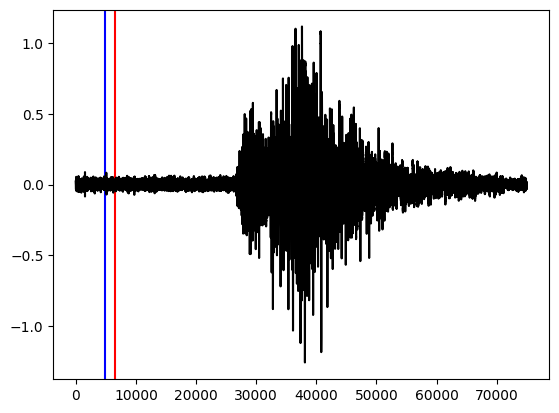

In [62]:
plt.axvline(np.argmax(eqt_preds[1]),c = 'blue')
plt.axvline(np.argmax(eqt_preds[2]),c = 'red')
plt.plot(st[0],c = 'black')

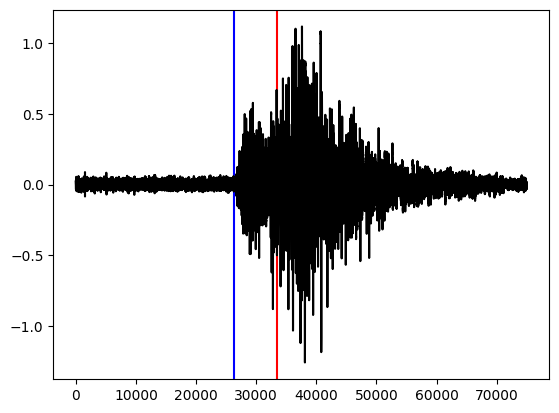

In [63]:
plt.axvline(st4[0].stats.sac['user1']*500,c = 'blue')
plt.axvline(st4[0].stats.sac['user2']*500,c ='r' )

plt.plot(st[0],c = 'black')